# 회귀
> 지도학습의 알고리즘은 크게 분류와 **회귀**로 나눌 수 있다.  
분류란, 샘플을 몇 개의 클래스 중 하나로 분류하여 예측하는 것이라면,  
**회귀란, 두 변수 사이의 상관관계를 분석하여 임의의 어떤 숫자를 예측하는 것이다.**  

> 예를 들어, 강아지, 고양이, 카멜레온 클래스들 중 입력 값이 어떤 동물인지를 예측하는 것이 분류이고,  
동물의 길이와 두께, 높이 특성들의 상관관계를 분석하여 몸무게를 예측하는 것이 회귀이다.

### 머신러닝
> ### ㄴ지도 학습
>> ### ㄴ 분류
>>> ### ㄴk-최근접 이웃
>> ### ㄴ 회귀
>>> ### ㄴ**k-최근접 이웃 회귀**
> ### ㄴ비지도 학습
> ### ㄴ강화 학습

# **머신러닝 제 2장**  
### **k-최근접 이웃 회귀(k-Nearest Neighbors - Regression)**  
> 예측하고자 하는 샘플에 가장 가까운 샘플 k개를 선택한다.  
이 때, k개의 샘플은 클래스가 아닌 임의의 수치이며, k개의 샘플의 평균을 구한다.

### **농어의 길이로 무게를 예측하자**

In [1]:
import numpy as np

#농어의 길이
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])

#농어의 무게
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

### **산점도로 표현**

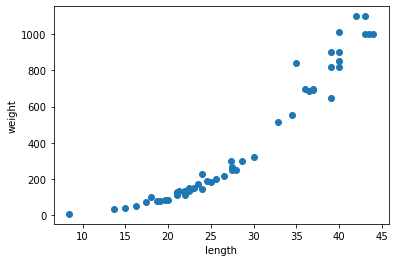

In [2]:
import matplotlib.pyplot as plt

plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

#농어의 길이가 커짐에 따라 무게도 증가한다.

### **훈련세트와 테스트세트 나누기**
import 오류 발생 시 

＄ conda remove --force scipy, numpy  
＄ pip install scipy  
＄ pip install numpy

In [16]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

### **훈련세트를 2차원 배열로 변환**
> **사이킷런에 사용할 훈련 세트는 반드시 2차원 배열이여야 한다.**  
[1,2,3]은 1차원 배열이기 때문에 (3,)으로 크기를 나타낸다.  
이를 [[1],[2],[3]]으로 변환하게 되면 (3,1)크기의 2차원 배열로 된다.


---
*이전 분류에서는 특성이 두 개였기 때문에 2차원 배열이였지만,  
농어의 무게를 예측하기 위한 특성은 한 개이기 때문에 직접 2차원 배열로 변환해야 한다.*


---


### **reshape()**
> 넘파이 배열은 reshape(열, 행)배열의 크기를 바꿀 수 있다.  
하지만 전체 원소 개수와 reshape에 전달한 행*열의 개수가 일치하지 않는다면 오류이다.

In [7]:
test_array = np.array([1,2,3,4])
print(test_array)
print(test_array.shape)

[1 2 3 4]
(4,)


In [8]:
test_array = test_array.reshape(4, 1)
print(test_array)
print(test_array.shape)

[[1]
 [2]
 [3]
 [4]]
(4, 1)


In [9]:
#행 자리에 -1을 하게 되면 각 원소를 모두 열로 만들어 준다.
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


### **테스트 세트 훈련**

In [10]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()
knr.fit(train_input, train_target)
knr.score(test_input, test_target)

0.992809406101064

### **R² 결정계수(Coefficient of determination)**
>회귀 문제에서 사용되는 대표적인 성능 측정 도구이다.  
회귀에서는 정확한 숫자를 맞힌 다는 것은 불가능에 가깝다.  
따라서 회귀의 경우 정확도를 R²라는 것을 사용하여 측정한다.

> 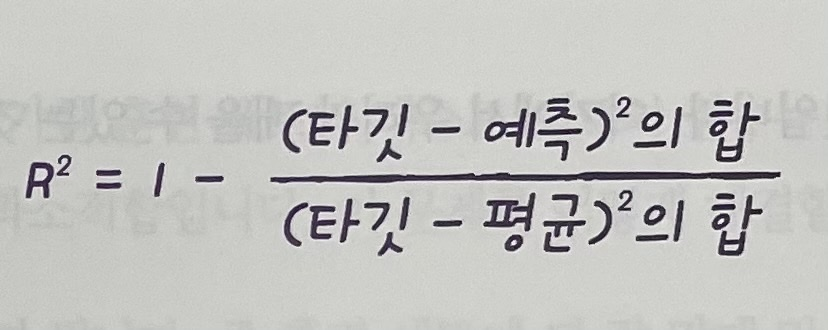

> 예측한 값이 타겟의 값과 가까워 질 수록 분자는 0에 가까워지고 R²는 1에 가까운 값이 나오게 된다.  
만약 예측한 값이 평균값과 비슷하다면 분자와 분모가 비슷해지기 때문에 R²는 0에 가까워진다.

### **예측 오차 구하기**
> 타겟에서 예측한 값을 빼면 오차를 알아낼 수 있다.

In [11]:
from sklearn.metrics import mean_absolute_error

#테스트 세트에 대한 예측
test_prediction = knr.predict(test_input)

#테스트 세트에 대한 평균 절대값 오차 계산
mae = mean_absolute_error(test_target, test_prediction)
mae

#평균적으로 예측값은 타겟에서 약 19g정도의 차이를 보인다.

19.157142857142862

### **테스트 세트가 아닌 훈련 세트로 평가**

In [12]:
knr.score(train_input, train_target)
#훈련 세트로 훈련했지만 테스트 세트보다 더 낮은 R²값이 나온다?!

0.9698823289099254

# **과대적합과 과소적합**

*   과대 적합(Overfitting) 
> 훈련 세트와 테스트 세트의 점수를 비교했을 때 훈련세트의 점수가 너무 높고  
테스트 세트에서는 점수가 너무 낮을 때.  
이는 훈련된 데이터에 너무 맞춰져 있기 때문에 훈련 데이터 이외의 변수에는 평가하기 힘들어진다.
*   과소 적합(Underfitting)
>과대 적합의 반대이거나 두 점수 모두 낮을 때  
모델이 너무 단순하고 데이터가 부족하면 학습이 제대로 되지 않기 때문에 발생한다.
*   일반화(generalization)
> 테스트 데이터에 대한 높은 정확도와 성능을 갖추는 것


---
위의 훈련 결과에서는 테스트 세트의 점수가 훈련 세트의 점수보다 높았기 때문에 **과소 적합**이다.

테스트 세트 : 0.9928094061010639  
훈련 세트 : 0.9698823289099255




### **과소 적합 해결방법**
> 훈련 세트에 더 잘 맞게 만들어서 테스트 세트의 점수를 낮추기 위해  
이웃하는 수치의 개수를 5개에서 3개로 감소시킨다.  
이웃의 개수를 줄이면 훈련 세트에 있는 데이터 패턴에 민감해지고,  
이웃의 개수를 늘리면 데이터 전반에 있는 일반적인 패턴에 따르게 된다.

In [13]:
knr.n_neighbors = 3

knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))
print(knr.score(test_input, test_target))

#테스트 세트의 평가점수가 더 낮아졌기 때문에 과소 적합을 해결했으며,
#두 점수의 차이가 크지 않기 때문에 과대 적합도 아니다.

0.9804899950518966
0.9746459963987609


### **[실습]**
1. k-최근접 이웃 회귀 모델을 새롭게 선언
2. 테스트 데이터(숭어의 길이)는 5~45까지의 데이터로 선언
3. 최근접 이웃의 개수를 1, 3, 5, 11개로 변경하면서 훈련 데이터로 총 4번 훈련
4. 각 훈련을 테스트

*초급*
- 산점도로 훈련 데이터를 표현한다.
- plt.title()을 통해 산점도별 각 최근접 이웃의 개수를 출력해준다.
- 산점도별 훈련 평가 점수(score())를 사용하여 R^2를 출력한다.

*중급*
- matplotlib에 있는 plot(x, y)을 사용하여 테스트 데이터의 길이와 예측한 무게를 전달하여 선 그래프를 산점도에 표현한다.
- 길이가 50cm인 숭어(이하 A)를 산점도에 표시한다.
- A는 초록색 삼각형으로 표시한다.

*고급*
- A의 최근접 이웃 수치를 산점도에 다이아몬드로 표시한다.
- 산점도별 A로 예측한 몸무게를 출력한다.

R^2 : 0.9852830341215901
prediction : [1000.]


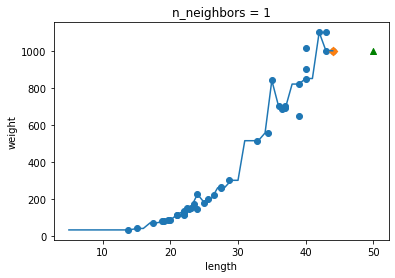

R^2 : 0.9804899950518966
prediction : [1033.33333333]


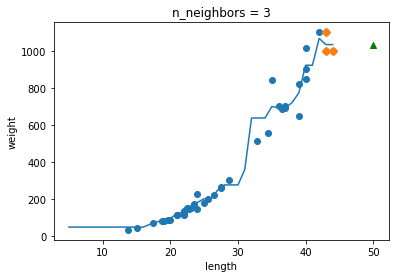

R^2 : 0.9698823289099254
prediction : [1010.]


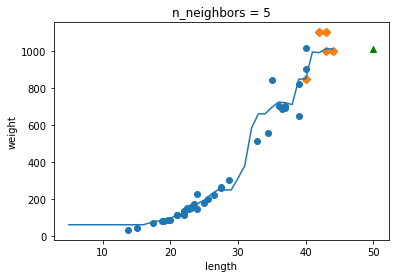

R^2 : 0.9515761381539326
prediction : [893.18181818]


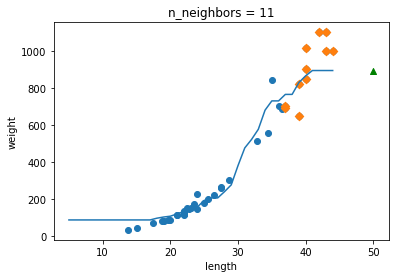

In [15]:
knr = KNeighborsRegressor()
x = np.arange(5, 45).reshape(-1, 1)
for n in [1, 3, 5, 11]:
  knr.n_neighbors = n
  knr.fit(train_input, train_target)
    
  distances, indexes = knr.kneighbors([[50]])
  prediction = knr.predict(x)#중급
    
  print("R^2 : {}".format(knr.score(train_input, train_target)))
  print("prediction : {}".format(knr.predict([[50]])))#고급
    
  plt.scatter(50, knr.predict([[50]]), color="green", marker='^')#중급
  plt.scatter(train_input, train_target)
  plt.scatter(train_input[indexes], train_target[indexes], marker='D')#고급
  plt.plot(x, prediction)#중급
  plt.title('n_neighbors = {}'.format(n))
  plt.xlabel('length')
  plt.ylabel('weight')
  plt.show()

### **k-최근접 이웃의 한계**
*숭어의 길이가 길어지면 더 큰 숭어의 훈련 데이터가 필요하다.*  
*매번 더 큰 숭어 데이터를 구해와야만 해결할 수 있는 것일까?*
